In [249]:
from astropy.io import fits
import numpy as np
from os.path import join
from numpy import random
density=20
logxi=1
datype="n{}_logxi_{}".format(density,logxi)
#specnnum="3"
bN=5000
skip=(bN+2)*0
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12


rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified",datype)

specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
if len(specE1)>13*bN:
    ite=14
else:
    print("ite=0")
    ite=0

skip=(bN+2)*ite

specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction1=np.loadtxt(join(rpatho,"current/fractions"))
#fionizE11=np.loadtxt(join(rpatho,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp1=tempeV1*eV/kb
htcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=0,max_rows=200,skiprows=200*ite)
clcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=1,max_rows=200,skiprows=200*ite)
htfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=2,max_rows=200,skiprows=200*ite)
clfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=3,max_rows=200,skiprows=200*ite)
#clrec1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
#cllines1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
cooling1=np.loadtxt(join(rpatho,"current/cooling"),max_rows=200,skiprows=200*ite)
heating1=np.loadtxt(join(rpatho,"current/heating"),max_rows=200,skiprows=200*ite)


specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
if len(specE2)>13*bN:
    ite=14
else:
    ite=0

skip=(bN+2)*ite

specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE2=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction2=np.loadtxt(join(rpath,"current/fractions"),max_rows=200,skiprows=200*ite)
depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp2=tempeV2*eV/kb
htcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=0,max_rows=200,skiprows=200*ite)
clcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=1,max_rows=200,skiprows=200*ite)
htfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=2,max_rows=200,skiprows=200*ite)
clfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=3,max_rows=200,skiprows=200*ite)
cooling2=np.loadtxt(join(rpath,"current/cooling"),max_rows=200,skiprows=200*ite)
heating2=np.loadtxt(join(rpath,"current/heating"),max_rows=200,skiprows=200*ite)




specE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0)
if len(specE3)>13*bN:
    ite=14
else:
    ite=0

skip=(bN+2)*ite

specE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction3=np.loadtxt(join(rpath3,"current/fractions"),max_rows=200,skiprows=200*ite)
depth3=np.loadtxt(join(rpath3,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
tempeV3=np.loadtxt(join(rpath3,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp3=tempeV3*eV/kb
htcomp3=np.loadtxt(join(rpath3,"current/partht"),usecols=0,max_rows=200,skiprows=200*ite)
clcomp3=np.loadtxt(join(rpath3,"current/partht"),usecols=1,max_rows=200,skiprows=200*ite)
htfreef3=np.loadtxt(join(rpath3,"current/partht"),usecols=2,max_rows=200,skiprows=200*ite)
clfreef3=np.loadtxt(join(rpath3,"current/partht"),usecols=3,max_rows=200,skiprows=200*ite)
cooling3=np.loadtxt(join(rpath3,"current/cooling"),max_rows=200,skiprows=200*ite)
heating3=np.loadtxt(join(rpath3,"current/heating"),max_rows=200,skiprows=200*ite)


#with warnings.catch_warnings():
    #warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')

#fionizE22=np.loadtxt(join(rpath,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
#fionizE22in=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=bN,skiprows=0)
#rpath82=join("/disk/bifrost/yuanze/xillver_res/ktbb1_no82",datype)
#specE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=0,max_rows=bN,skiprows=skip)
#foutE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=1,max_rows=bN,skiprows=skip)
#fionizE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=5,max_rows=bN,skiprows=skip)


specnnum=4
rxinput=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec%s_output.dat"%specnnum).T
rxinput2=np.loadtxt("/disk/bifrost/yuanze/reflionx/jj_240214_spec1_output.dat").T



#fspecE=np.loadtxt(join(rpath,"fullspec"),usecols=1,max_rows=500,skiprows=1)
#fIout=np.loadtxt(join(rpath,"fullspec"),usecols=2,max_rows=500,skiprows=1)

ite=0


In [1394]:
#Let's get the ion fractions: reading ion fractions now
import bisect
import matplotlib.pyplot as plt


feselected=[ 'Fe_%d'%n for n in range(1,26)]
oselected=['O_%d'%n for n in range(1,8)]
elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
plelements=['H','He','C','O','Fe']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

spect=[]
specto=[]
linedic={}
linedico={}
for layer in range(1,201):

    fractiono=fraction1[layer-1]
    fraction=fraction2[layer-1]
    for ind in range(len(fraction)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            linedic[elements[k]+"_%d"%(ind+1)]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=fractiono[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=fractiono[ind]
    spect.append(linedic.copy())
    specto.append(linedico.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])


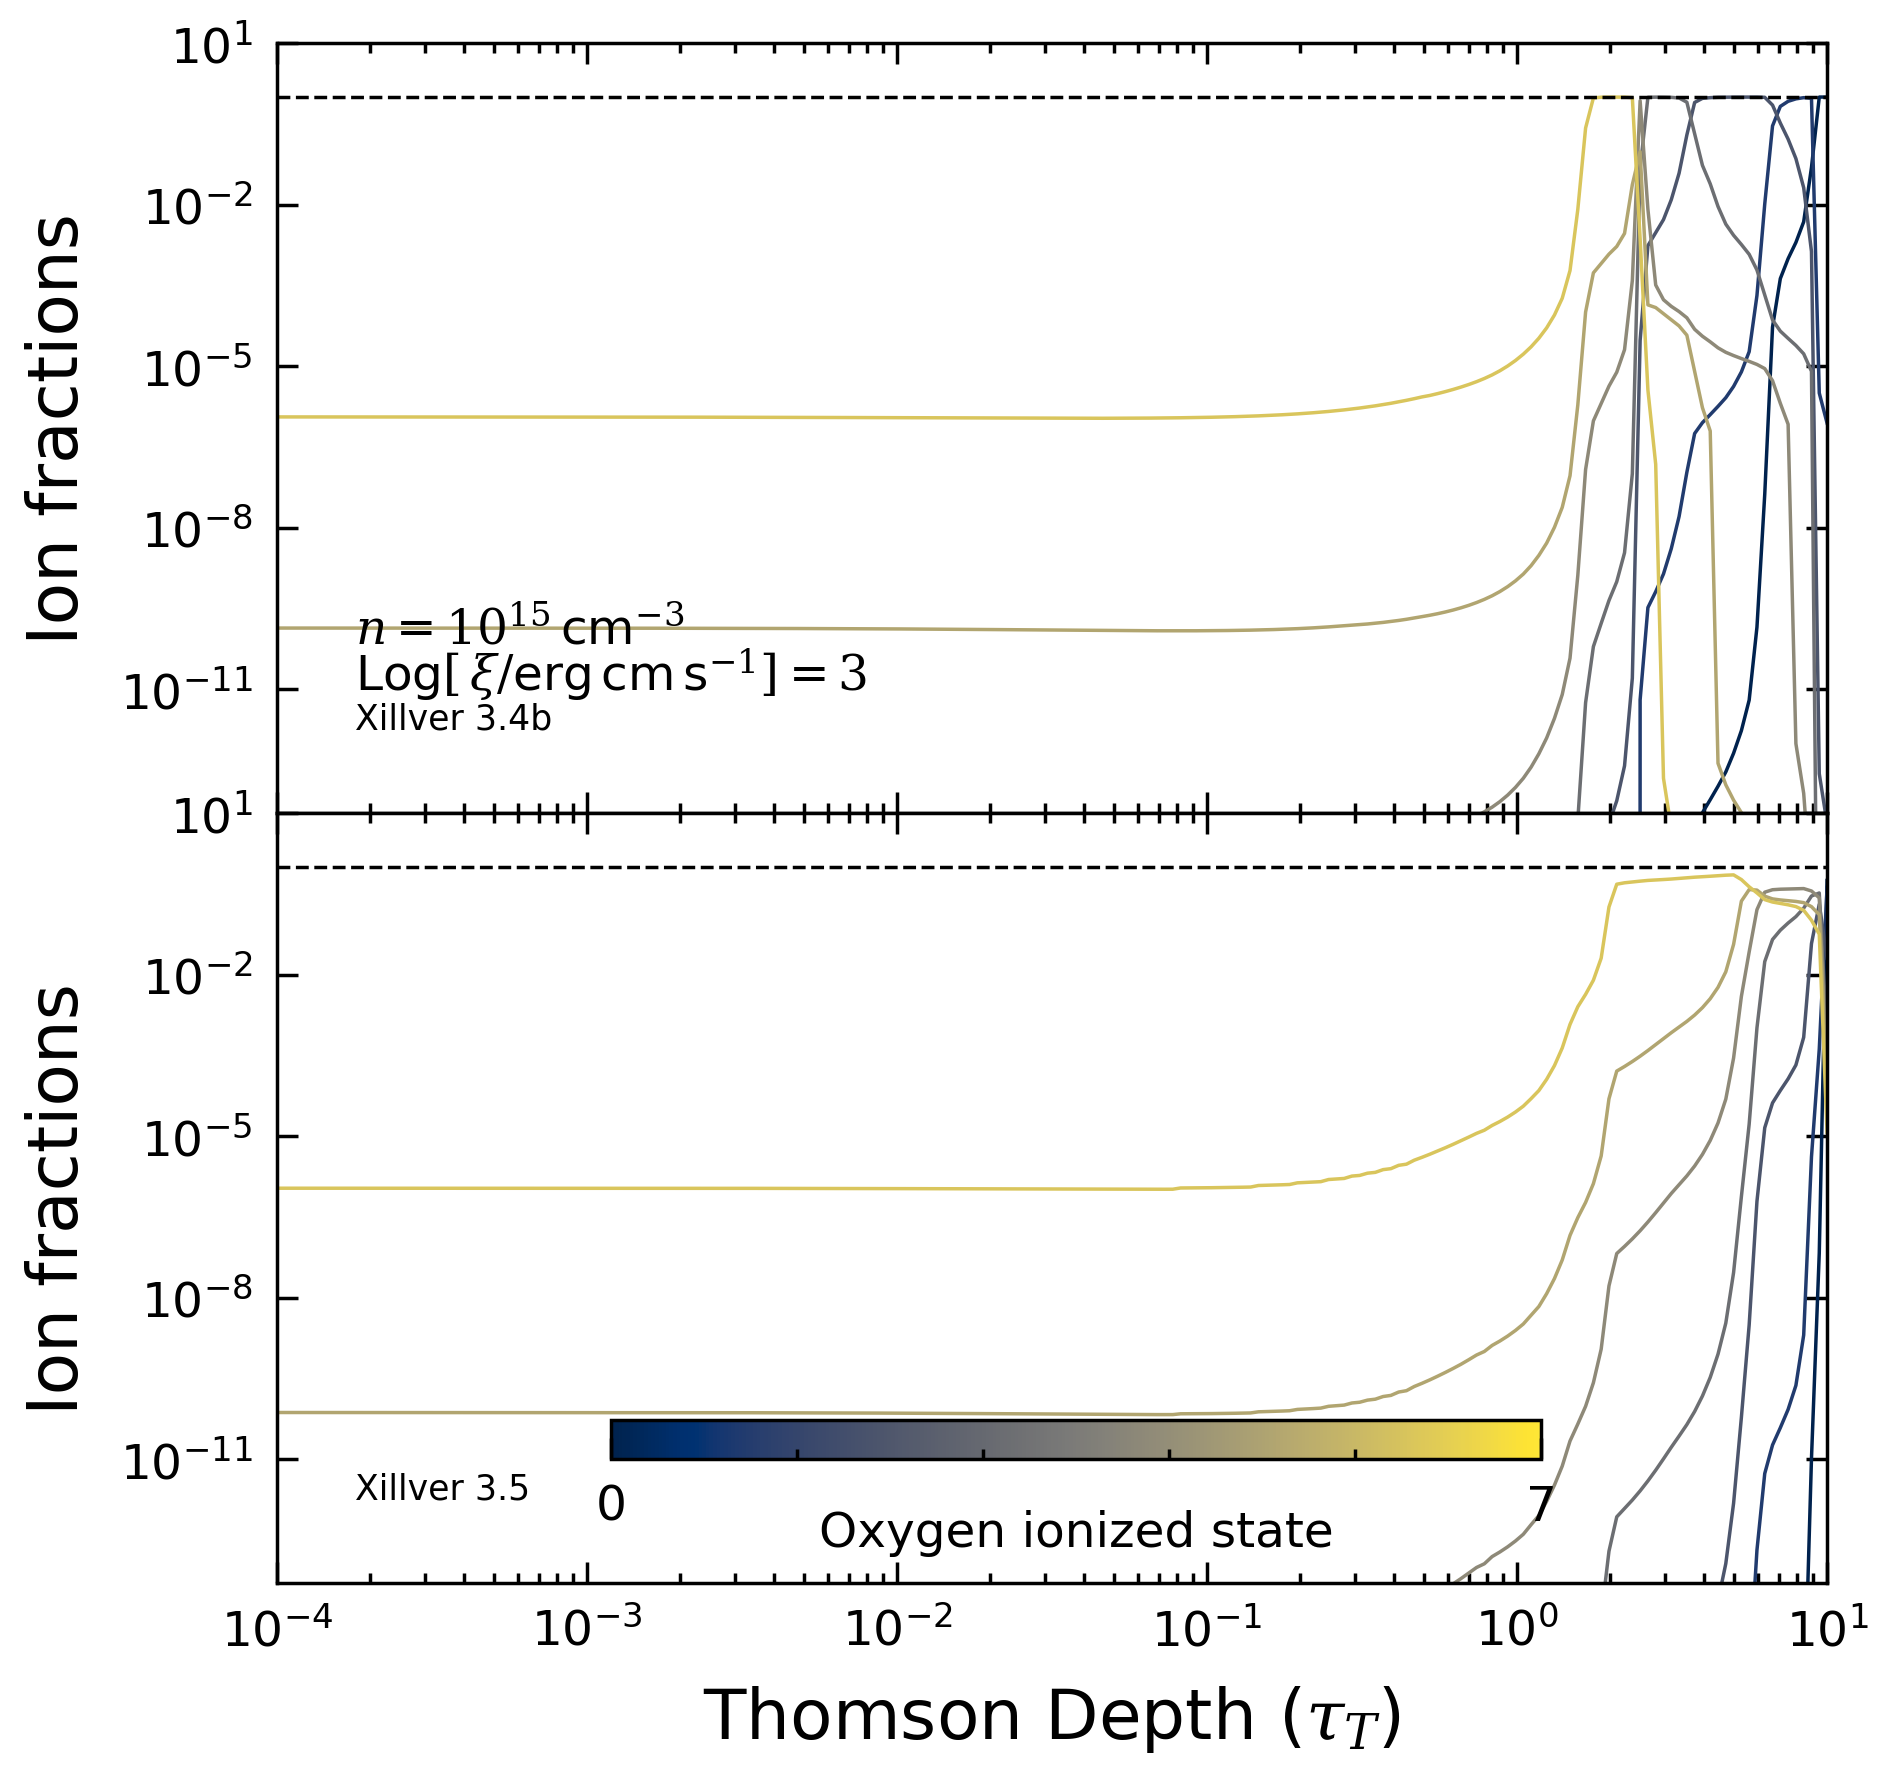

In [1395]:
#Plotting Oxygen and Iron ion fractions
numrow=2
numcol=1
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
lw=0.5
cmap = matplotlib.cm.get_cmap('cividis')
sm = plt.cm.ScalarMappable(cmap=cmap)
element="Oxygen"
#element="Iron"
ionselect=oselected
#ionselect=feselected
nion=len(ionselect)

colors=matplotlib.cm.cividis(np.arange(nion)/nion)

for eind,e in enumerate(ionselect):
        
    y1=np.array([data[e] for data in specto])
    y2=np.array([data[e] for data in spect])

    axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw)
    gion.append(e)

    axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw)

axins1 = inset_axes(axs[1],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[1].transAxes)
cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
cbar.set_label(label=r"{} ionized state".format(element), labelpad=-3,fontsize=7)
cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].axhline(y=1,ls="--",lw=0.5,color='k')
axs[1].axhline(y=1,ls="--",lw=0.5,color='k')
axs[0].text(0.05,0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes)
axs[0].text(0.05, 0.1,"Xillver 3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"Xillver 3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[0].set_ylim([5e-14,10])
axs[1].set_ylim([5e-14,10])
axs[0].set_xlim([1e-4,10]
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=10)
axs[0].set_ylabel("Ion fractions",fontsize=10)
axs[1].set_ylabel("Ion fractions",fontsize=10)


fig.savefig("./pub2/{}state_n{}_logxi_{}.pdf".format(element,density,logxi))


In [1377]:
#Reading heating and cooling rates
import bisect
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes




feselected=[ 'Fe_%d'%n for n in range(1,26)]

elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
plelements=['H','He','O','Fe']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

heat=[]
heato=[]
heatosum=[]
cool=[]
coolo=[]
linedic={}
linedicosum={}
linedico={}
linec={}
lineco={}
for layer in range(1,201):

    heatingo=heating1[layer-1]
    heating=heating2[layer-1]
    coolingo=cooling1[layer-1]
    cooling=cooling2[layer-1]
    for ind in range(len(heating)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            #linedic[elements[k]+"_%d"%(ind+1)]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=heatingo[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            #linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=heatingo[ind]
        if elements[k] in linedicosum.keys():
            linedicosum[elements[k]]+=np.float64(heatingo[ind])
            lineco[elements[k]]+=np.float64(coolingo[ind])
        else:
            linedicosum[elements[k]]=np.float64(heatingo[ind])
            lineco[elements[k]]=np.float64(coolingo[ind])
        
    for ind in range(len(elements)):
        linedic[elements[ind]]=heating[ind]
        linec[elements[ind]]=cooling[ind]
    heat.append(linedic.copy())
    heato.append(linedico.copy())
    heatosum.append(linedicosum.copy())
    cool.append(linec.copy())
    coolo.append(lineco.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

/tmp/ipykernel_3416473/979350961.py:101: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[1].legend([axdict2[e] for e in gion],ncols=3,labels=gion,fontsize=5,\


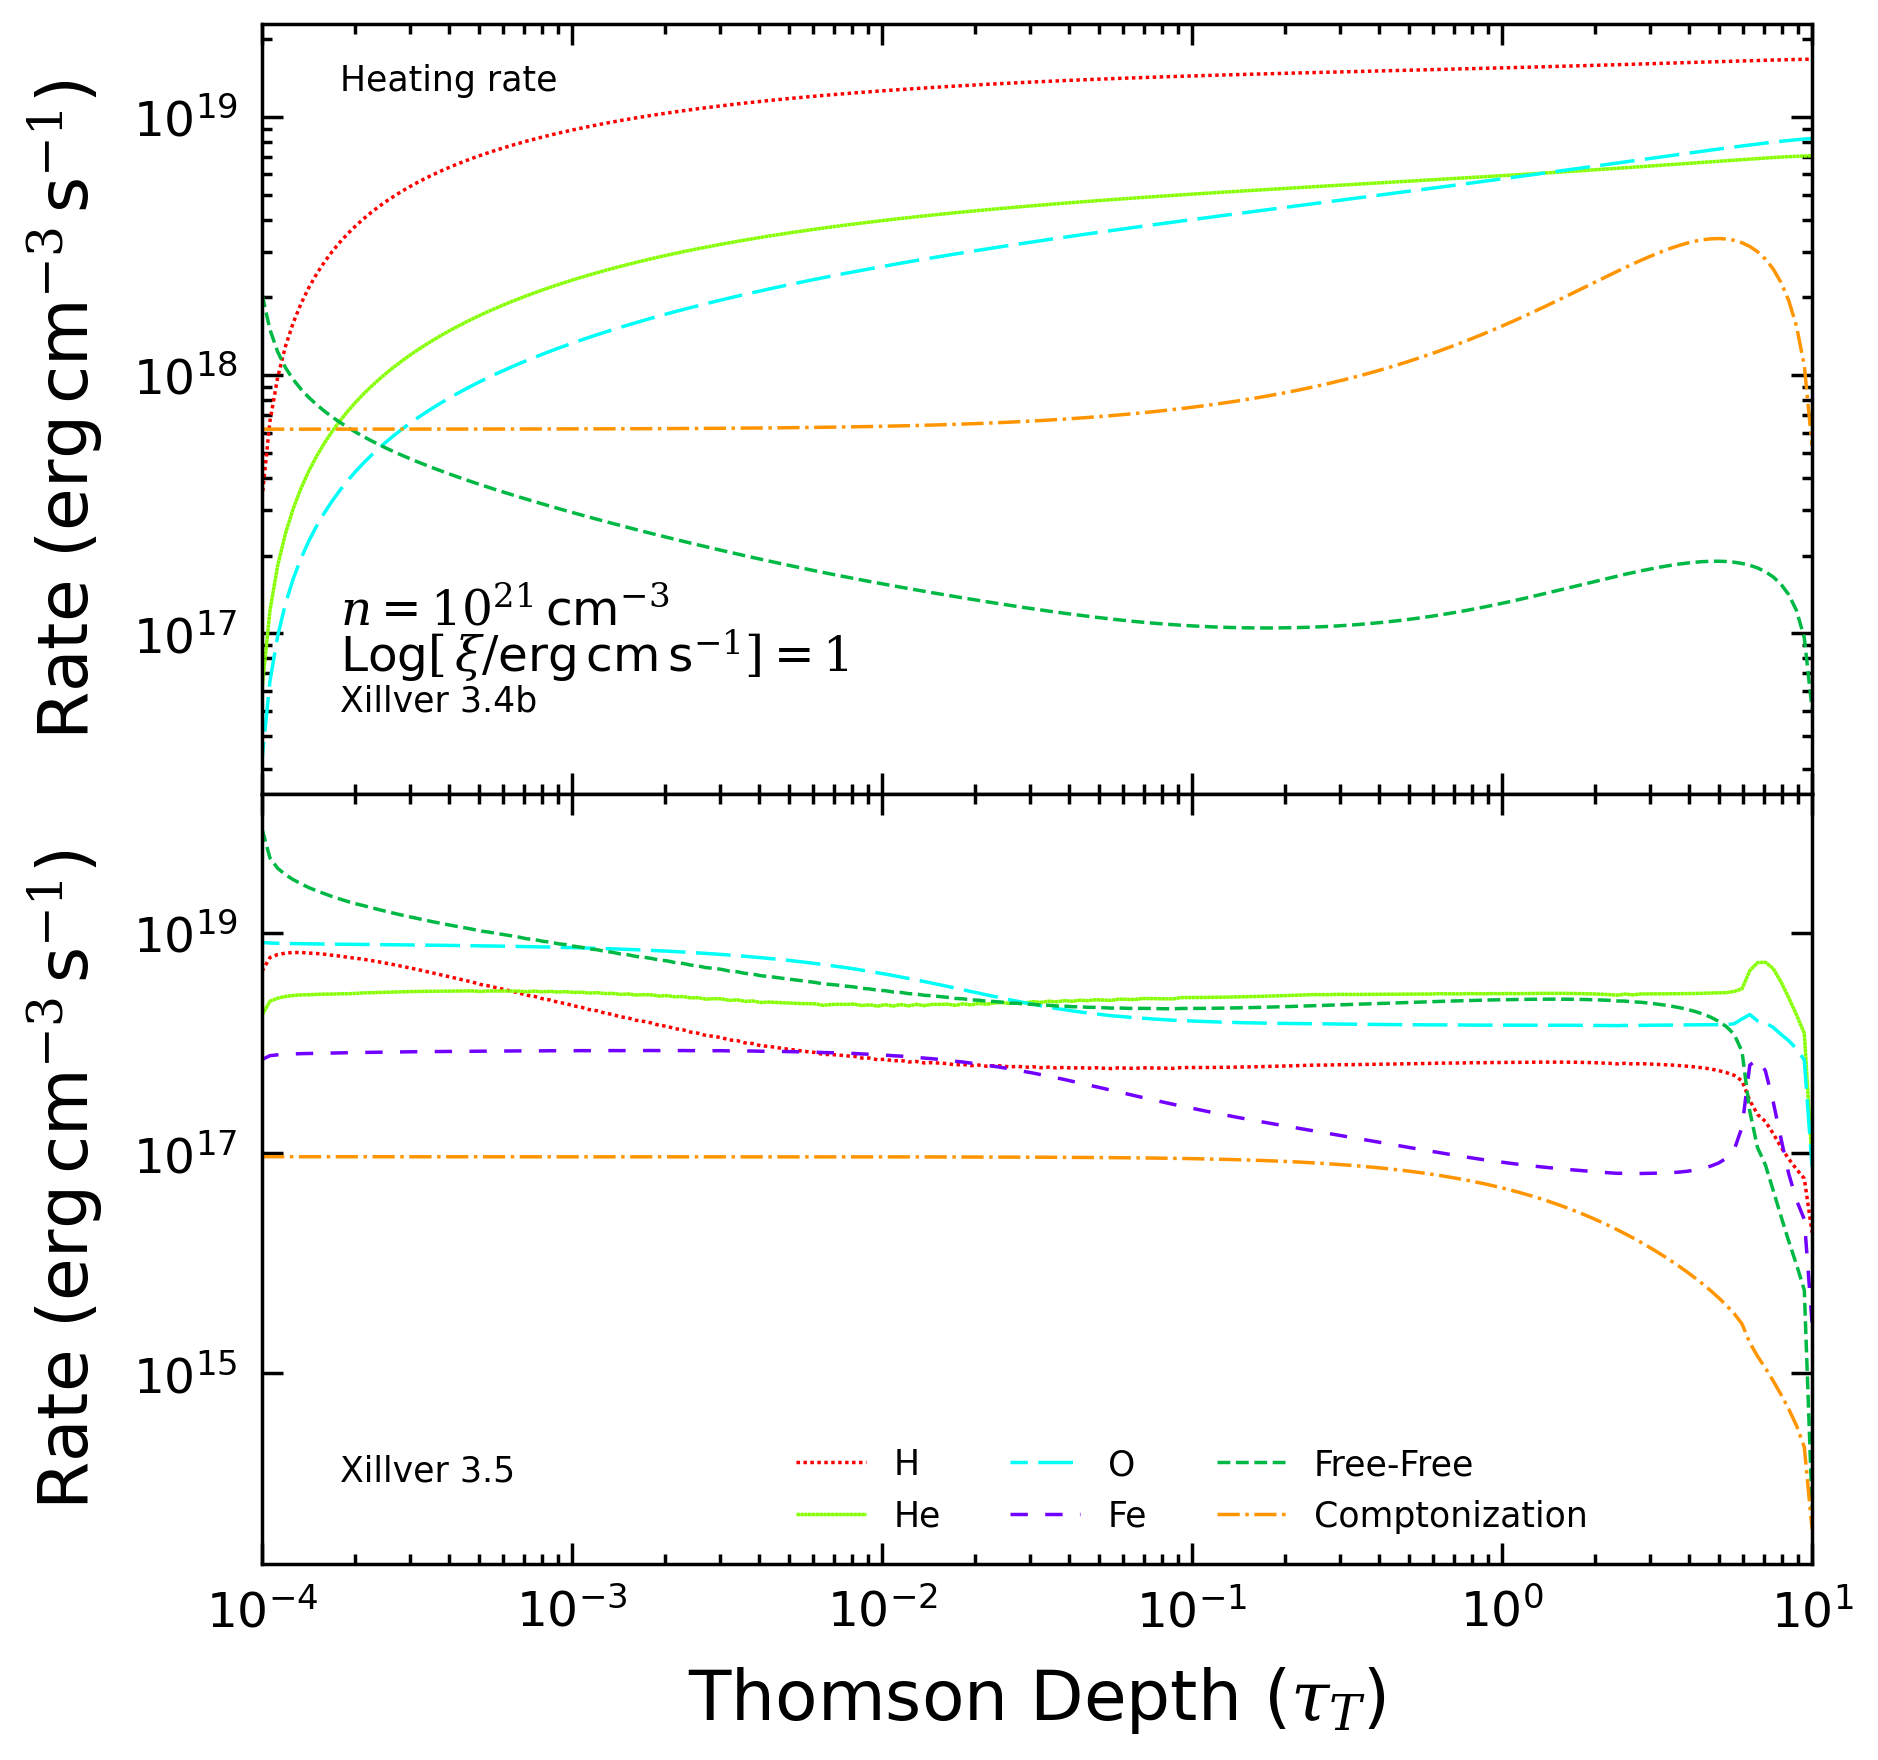

In [1378]:
##Comparing heating for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
lw=0.5

sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=plelements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.hsv(np.arange(nion)/nion)

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
ls=[(0, (1, 1)),(0, (1, 0.1)),(5, (10, 3)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),\
   (0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1)),(0, (5, 5))\
    ,(0, (3, 1, 1, 1, 1, 1)),(0, (1, 0.1)),(0, (5, 5))]

#ls=[lst[1] for lst in linestyle_tuple]
#,linestyle=ls[len(gion)]
for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y2=np.array([data[e] for data in heat])
    
    if np.any(y2>10):
        pnum=len(axdict2)
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw,ls=ls[pnum])
        gion.append(e)
        
    if e != "Fe":
        y1=np.array([data[e] for data in heatosum])
        if np.any(y1>10):
            axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw,ls=ls[pnum])

#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,htfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htfreef2,'--C1',lw=lw)
gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,htcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htcomp2,'-.C2',lw=lw)
gion.append(mech)

#axs[0].plot(depth1,htlines1,'-.C2',lw=lw)
#axins1 = inset_axes(axs[1],
#                    width="60%",  # width = 50% of parent_bbox width
#                    height="5%",  # height : 5%
#                    loc='lower left',
#                    bbox_to_anchor=(0.2,0.13,1,1),
#                    bbox_transform=axs[1].transAxes)
#cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
#cbar.set_label(label=r"Z", labelpad=-1)
#cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].text(0.05, 0.95,"Heating rate",transform=axs[0].transAxes\
            ,verticalalignment='top',horizontalalignment='left',fontsize=5)
axs[0].text(0.05,0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes)

axs[0].text(0.05, 0.1,"Xillver 3.4b",transform=axs[0].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"Xillver 3.5",transform=axs[1].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=10)
axs[0].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].legend([axdict2[e] for e in gion],ncols=3,labels=gion,fontsize=5,\
              loc='lower center',bbox_to_anchor=(0.6,0))
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("./pub2/heatingrates_{}.pdf".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

/tmp/ipykernel_3416473/4025006229.py:74: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[1].legend([axdict1[e] for e in gion],labels=gion,fontsize=5,ncol=3,loc='lower center',bbox_to_anchor=(0.65,0))


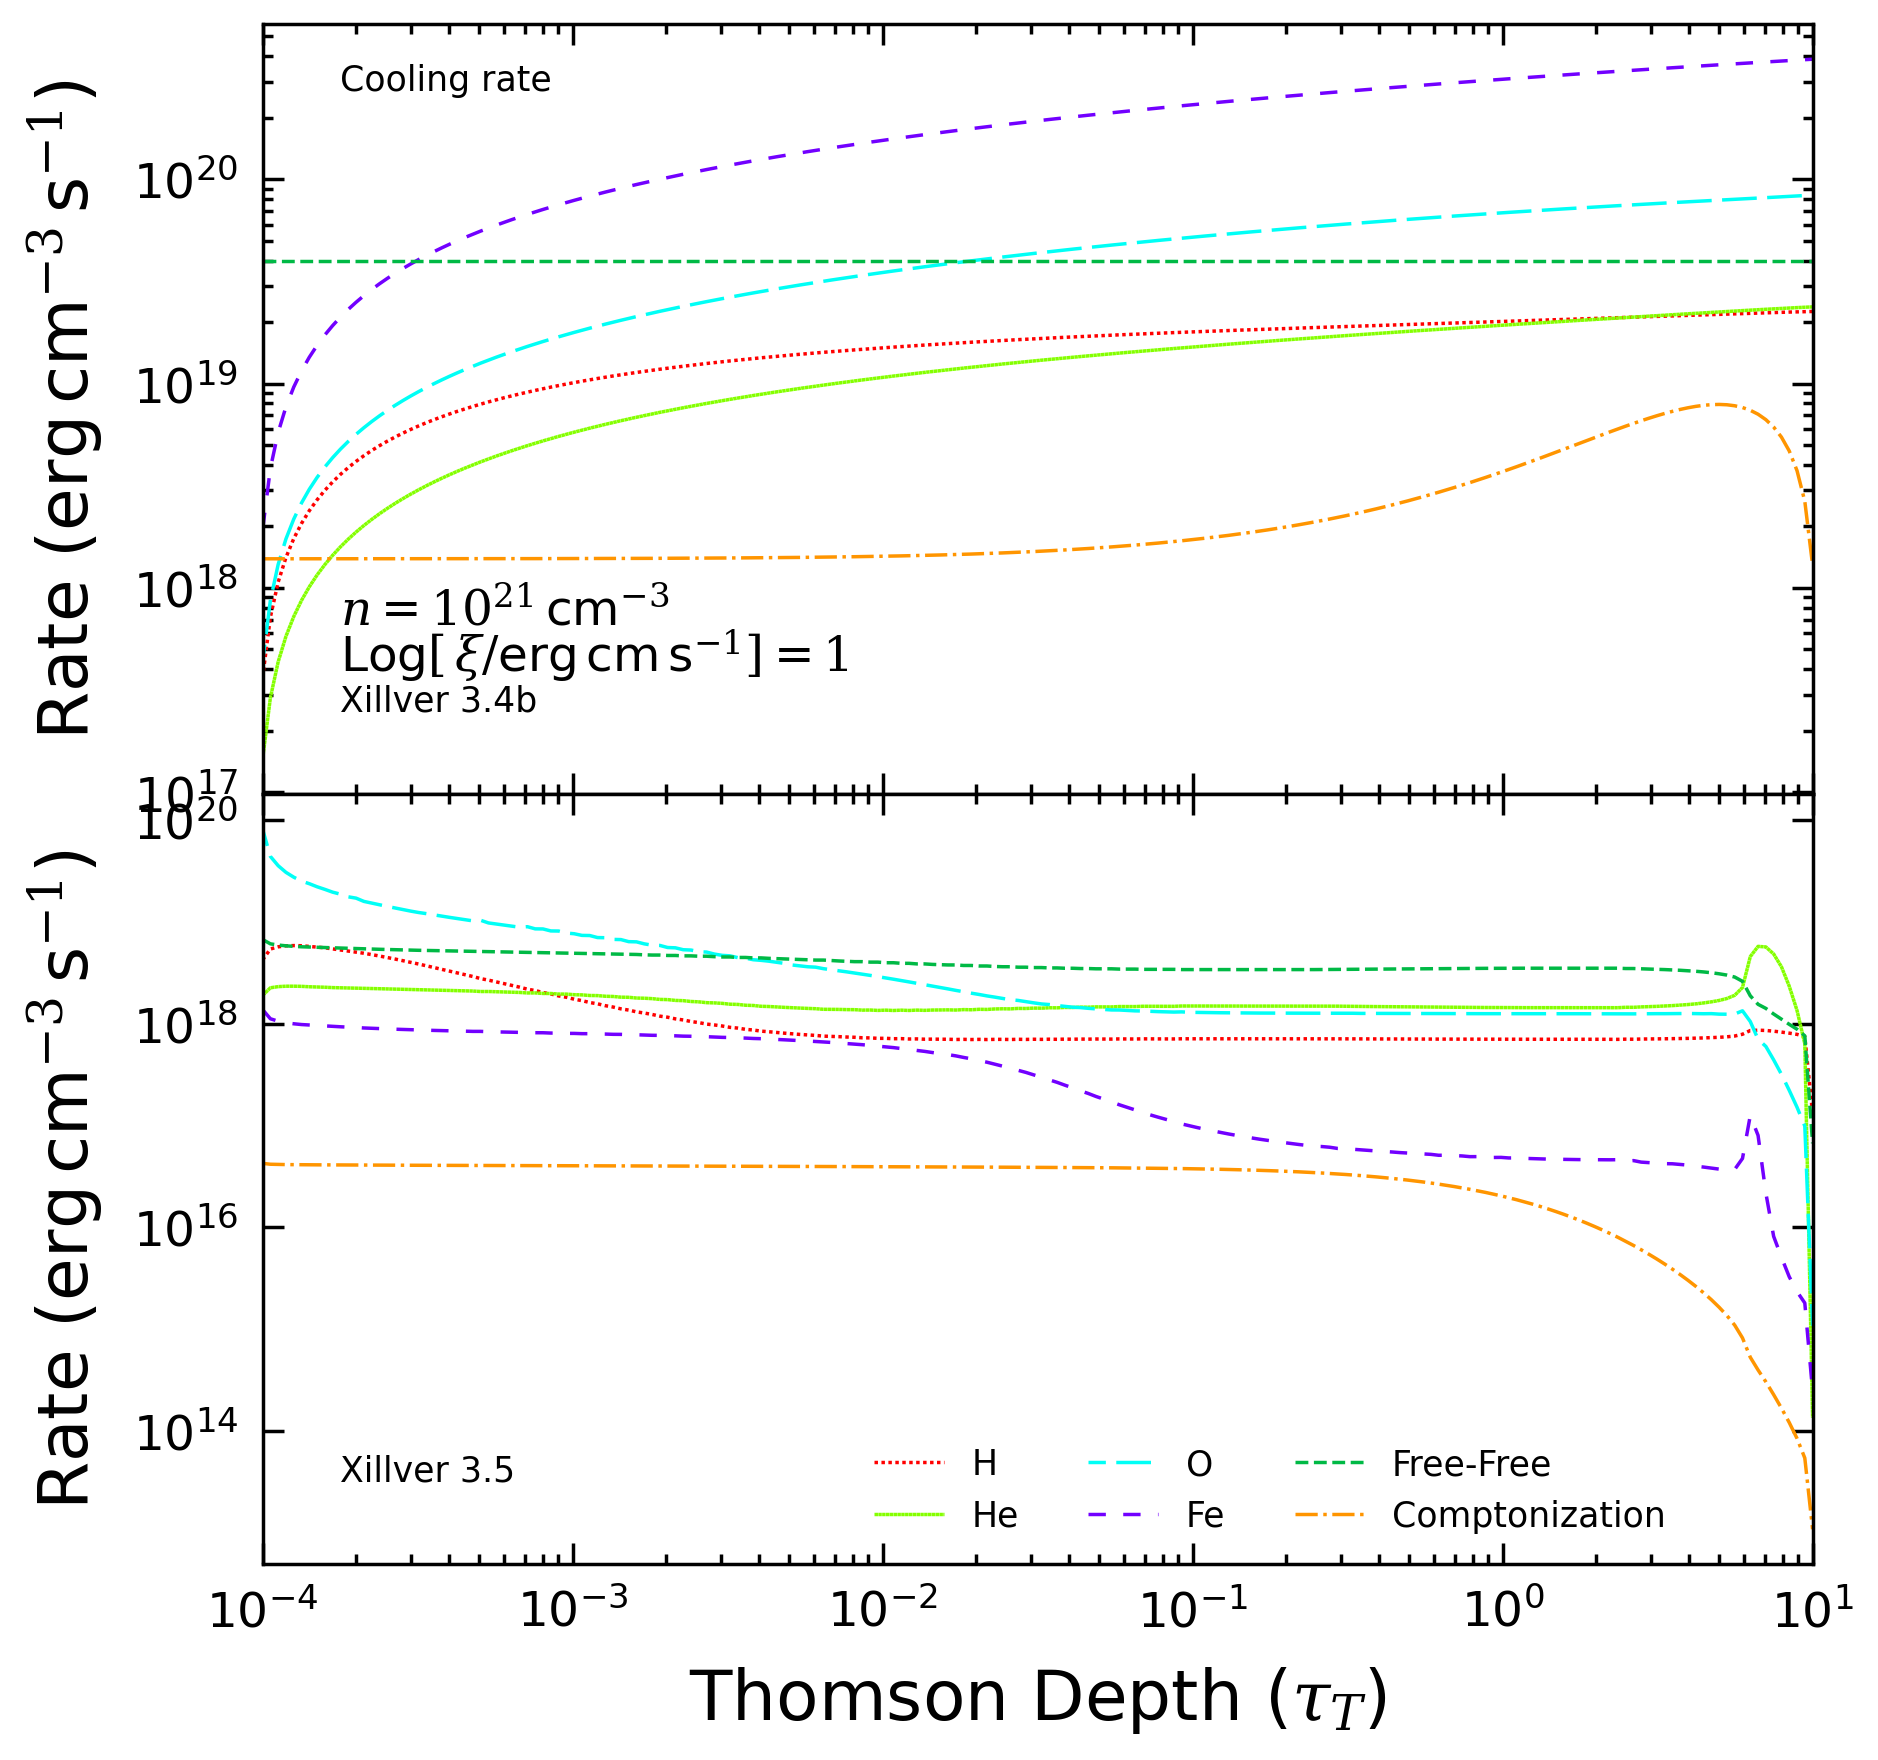

In [1379]:
##Comparing cooling profile for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})
lw=0.5
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=plelements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.hsv(np.arange(nion)/nion)
ls=[(0, (1, 1)),(0, (1, 0.1)),(5, (10, 3)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),\
   (0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1)),(0, (5, 5))\
    ,(0, (3, 1, 1, 1, 1, 1)),(0, (1, 0.1)),(0, (5, 5))]

for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y1=np.array([data[e] for data in coolo])
    y2=np.array([data[e] for data in cool])
    if np.any(y1>10):
        pnum=len(axdict1)
        axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw,ls=ls[pnum])
        gion.append(e)
    if np.any(y2>10):
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw,ls=ls[pnum])
        
#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,clfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clfreef2,'--C1',lw=lw)
gion.append(mech)
#mech='Recombination'
#axdict1[mech]=axs[0].plot(depth1,clrec1,'--C3',lw=lw)
#gion.append(mech)
#mech='Line Cooling'
#axdict1[mech]=axs[0].plot(depth1,cllines1,'-.C4',lw=lw)
#gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,clcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clcomp2,'-.C2',lw=lw)
gion.append(mech)
axs[0].text(0.05, 0.95,"Cooling rate",transform=axs[0].transAxes\
            ,verticalalignment='top',horizontalalignment='left',fontsize=5)
axs[0].text(0.05,0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes)
axs[0].text(0.05, 0.1,"Xillver 3.4b",transform=axs[0].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"Xillver 3.5",transform=axs[1].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=10)
axs[0].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].legend([axdict1[e] for e in gion],labels=gion,fontsize=5,ncol=3,loc='lower center',bbox_to_anchor=(0.65,0))
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("./pub2/coolingrates_{}.pdf".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [224]:
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits

# Clean the figure
plt.clf()

lw = 2   # Line widths throughout the plot
fsz = 16 # Font size throughout the plot

plt.rc('axes', labelsize=14)  # fontsize of the x any y labels

# Load local models
#AllModels.lmod("relxill")

# Energies
AllModels.setEnergies("1e-2 1000. 1000 log")

# Define the Model
m1 = Model("atable{/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v2.fits}")
Xset.abund="grsa"
print(density)
print(logxi)
m1(1).values = "1.E+{}".format(density)      # reflionx density
m1(2).values = "{}".format(10**logxi)     # reflionx   logxi
m1(3).values = "1.0"      # reflionx   A_Fe
m1(4).values = "100."   # reflionx kT_e
m1(5).values = "2.0"   # reflionx gamma
m1(6).values = "0.100001"   # reflionx kT_bb
m1(8).values = "1.0"   # reflionx norm

Plot("emodel")
rx = np.array(Plot.x())
rxmo = np.array(Plot.model())
AllModels.show()
#m1(3).values = "0"
#Plot("eemodel")
#xorgvals = Plot.x()
#yorgvals = Plot.model()

21
Models will now use energy array created from:
   0.01 - 1000   1000 log bins


1

Model atable{/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v2.fits}<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   REFLIONX   Density             5.50000E+18  +/-  0.0          
   2    1   REFLIONX   Xi                  293.776      +/-  0.0          
   3    1   REFLIONX   A_Fe                1.69901      +/-  0.0          
   4    1   REFLIONX   kT_e                76.1908      +/-  0.0          
   5    1   REFLIONX   gamma               2.00050      +/-  0.0          
   6    1   REFLIONX   kT_bb               0.387298     +/-  0.0          
   7    1   REFLIONX   z                   0.0          frozen
   8    1   REFLIONX   norm                1.00000      +/-  0.0          
________________________________________________________________________


***Warning: Magnitudes of parameters in model for data group 1
     have been found to di

<Figure size 350x262.5 with 0 Axes>

    1.00000      +/-  0.0          
________________________________________________________________________



In [128]:
from astropy.io import fits
import numpy as np
from os.path import join
from numpy import random
from scipy.integrate import simps

bN=5000

h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
cut=0 #cutting at 1000 means ~2 eV==6200 A
#Darray=["15","18","21"]
#garray=["1.5","2"]
#xiarray=["2","3","3.7"]
Darray=["21"]
garray=["2"]
xiarray=["1"]

energy=[]
flux=[]

#for density in Darray:


for density in Darray:
    for gamma in garray:
        for logxi in xiarray:
            print(density,gamma,logxi)
            datype="n{}_logxi_{}".format(density,logxi)
            #datype="n{}_logxi_{}".format(density,logxi)
            rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
            specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)

            if len(specE2)>10*bN:
                ite=14
            else:
                ite=0
            skip=(bN+2)*ite

            specE2=np.loadtxt(join(rpath,"current/intensity"),usecols=0,max_rows=bN,skiprows=skip)
            foutE2=np.loadtxt(join(rpath,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)

            ind=foutE2<0
            foutE2[ind]=0
            
            fbin=[]
            for i in range(bN-1):
                fbin.append(simps(foutE2[i:i+2],specE2[i:i+2]*eV))
            energy.append(specE2[cut:4999]/1000)
            flux.append(fbin[cut:4999]/specE2[cut:4999]/eV)
    


21 2 1


Text(0.05, 0.87, 'Log$[\\,\\xi/$erg$\\,$cm$\\,$s$^{-1}]=1 $')

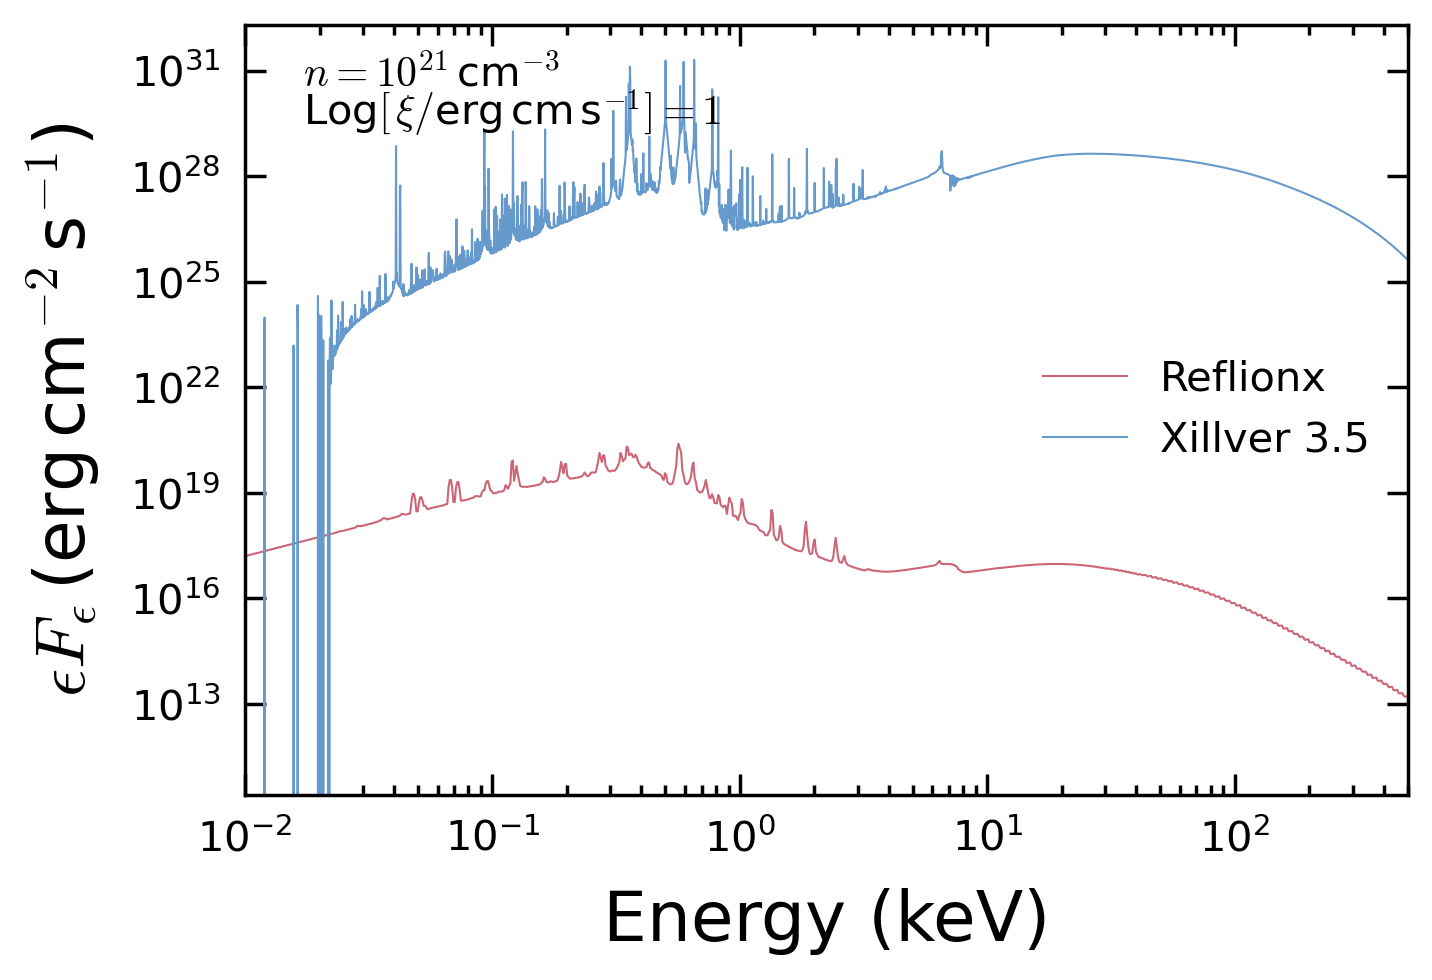

In [242]:
#Ploting spectra for publication
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":6,
"legend.fancybox":True})

lw=0.3
numrow=1
numcol=1
colorlst=["#CC6677","#88CCEE","#6699CC"]
fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

diff1=np.abs(rx-20)
diff2=np.abs(specE2/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
#fac=foutE2[ind2]*eV*specE2[ind2]/rxmo[ind1]
fac=1e20
#Setting negative fluxes to zero
find=foutE2<0
foutE2[find]=0.


axs.plot(rx,fac*rxmo,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(rxinput[0],fac*rxinput[2],"r-.")

#axs.plot(specE1/1e3,foutE1*eV*specE1,color=colorlst[1],label="Xillver 3.4b",lw=lw)
#axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)

#axs.plot(energy[0],flux[0]*energy[0]*1e3*eV,color=colorlst[1],ms=0.5,label="per channel",lw=lw)


axs.plot(specE2/1e3,foutE2*specE2/1e3,color=colorlst[2],ms=0.5,label="Xillver 3.5",lw=lw)

#axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
#axs.plot(specE3/1e3,foutE3*eV*specE3,"C2",ms=0.5,label="Xillver 3.5(ATDB2021)",lw=lw)

#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
axs.legend(loc='best')
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,500])
#axs.set_ylim([5e14,5e23])
#plt.axvline(x=)
#axs=plt.gca()
axs.text(0.05,0.92,r"$n=10^{%s}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%s $"%logxi,transform=axs.transAxes)



#plt.savefig("./pub2/compRX"+datype+".pdf",dpi=300)

In [253]:
import numpy as np
cut=0
fac=1e20
Lout=np.trapz(foutE2[cut:],x=specE2[cut:]*eV)
Lin=np.trapz(fionizE2[cut:],x=specE2[cut:]*eV)
Linrx=np.trapz(rxinput[2][cut:]*fac/rxinput[0][cut:],x=rxinput[0][cut:]*1e3*eV)
Loutrx=np.trapz(rxinput[3][cut:]*fac/rxinput[0][cut:],x=rxinput[0][cut:]*1e3*eV)


In [254]:
print(Lout*4*np.pi/1e20,Lin*4*np.pi/1e20)
print((Lin-Lout)/Lin)
print((Linrx-Loutrx)/Linrx)
print(Loutrx*4*np.pi/1e20,Linrx*4*np.pi/1e20)

8.84700791302111 10.418992975853799
0.15087687135175054
-0.40638996967045443
14.064918615141481 10.000724492110233


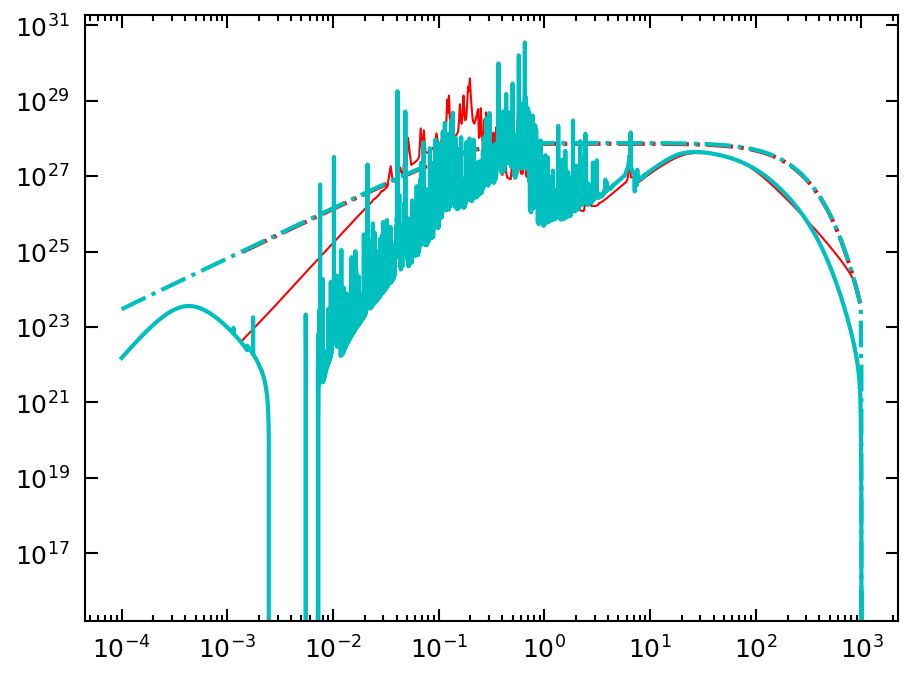

In [250]:

fig=plt.figure(dpi=300)
plt.plot(rxinput[0],fac*rxinput[2],"r-.")
plt.plot(rxinput[0],fac*rxinput[3],"r",label="Reflionx",lw=0.5)

#plt.plot(rxinput2[0],fac*rxinput2[2],"k-.")
#plt.plot(rxinput2[0],fac*rxinput2[3],"k",label="Reflionx_jj",lw=0.5)

plt.plot(specE2/1e3,foutE2*specE2/1e3,"c",label="Xillver_3.4b",ms=1)
plt.plot(specE2/1e3,fionizE2*specE2/1e3,"c-.",ms=0.5)
plt.xscale("log")
plt.yscale("log")

In [154]:
Lrefx=np.trapz(rxmo[cut:]*rx[cut:]*1e3*eV,x=rx[cut:])

In [156]:
Lff=1e21*10/(4*np.pi)
Lrefx*4*np.pi/1e21

7.783387111906553e-30

4.604274679257088e+16


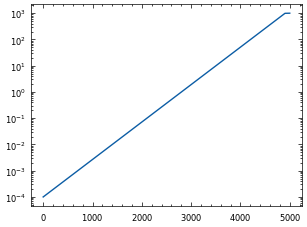

In [127]:
plt.plot(specE2[cut:]/1e3)
plt.yscale("log")
print(fac)

/tmp/ipykernel_3416473/2530501197.py:1: RuntimeWarning: divide by zero encountered in divide
  ra=foutE3/foutE2


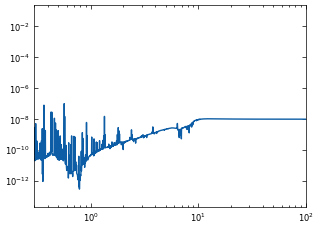

In [1271]:
ra=foutE3/foutE2
plt.plot(specE2/1e3,ra)
plt.xlim([0.3,100])
plt.xscale("log")
plt.yscale("log")

/tmp/ipykernel_1035685/297256079.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('hsv')


n15_logxi_3 :in spec1, ite=0
15
n18_logxi_3 :in spec1, ite=0


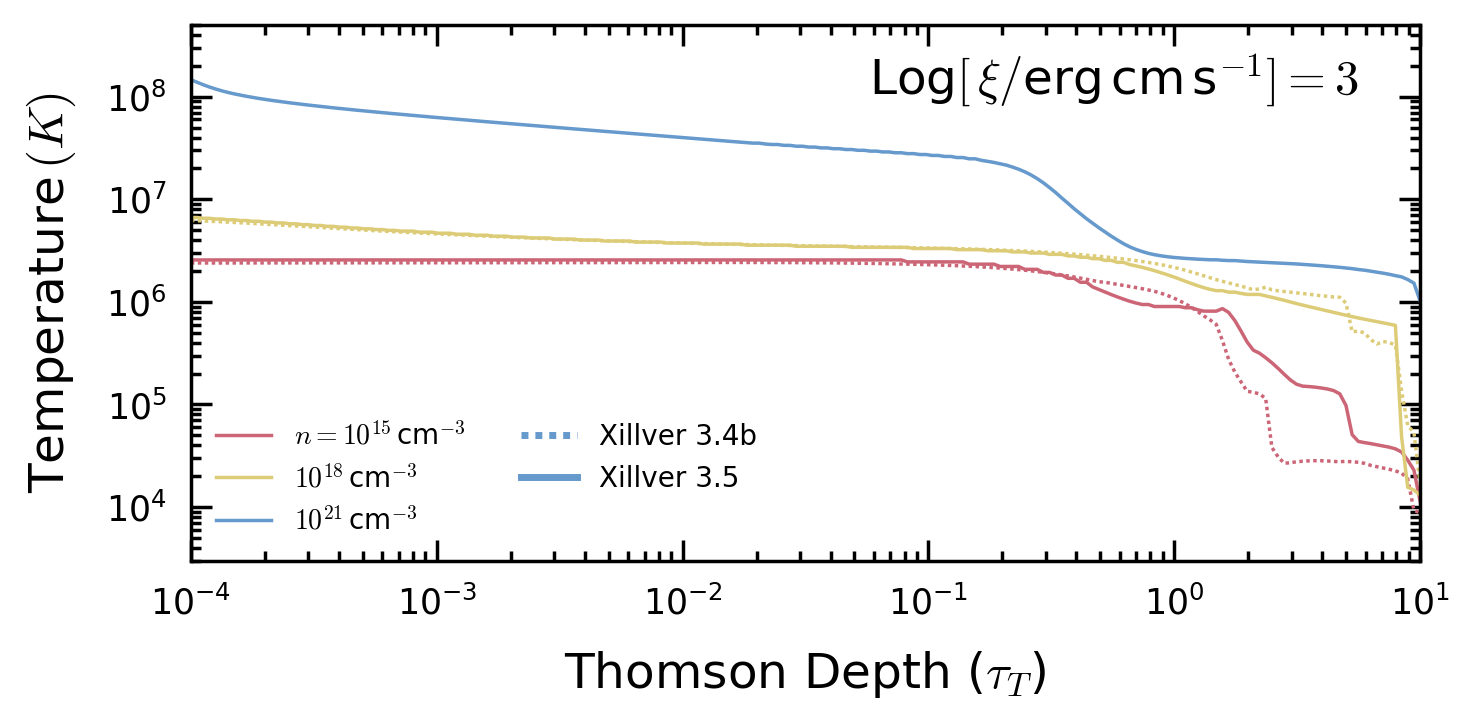

In [56]:
#Comparing different iterations
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from os.path import join
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
colors=["#CC6677","#DDCC77","#6699CC"]
darray=[15,18,21]
logxi=3

eV=1.602e-12
kb=1.3807e-16


numrow=1
numcol=1
lw=0.5
cmap = matplotlib.cm.get_cmap('hsv')
sm = plt.cm.ScalarMappable(cmap=cmap)
#colors=matplotlib.cm.hsv(np.arange(len(darray))/len(darray))

fig=plt.figure(figsize=(3*numcol,1.5*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol,hspace=0)
axs=gs.subplots(sharex=True)
lines=[]

for dind,density in enumerate(darray):
    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified",datype)
    rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)

   # if density != 21:
    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>2*bN:
        ite=14
    else:
        print(datype,":in spec1, ite=0")
        ite=0

    depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
    tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp1=tempeV1*eV/kb


   # specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
   # if len(specE2)>2*bN:
   #     ite=14
   # else:
   #     print(datype,":in spec2, ite=0")
   #     ite=0

    #depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    #tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    #temp2=tempeV2*eV/kb

    specE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0)
    if len(specE3)>2*bN:
        ite=14
    else:
        print(datype,":in spec3, ite=0")
        ite=0

    depth3=np.loadtxt(join(rpath3,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    tempeV3=np.loadtxt(join(rpath3,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp3=tempeV3*eV/kb

    if dind==0:
        if density != 21:
            axs.plot(depth1,temp1,color=colors[dind],lw=lw,ls=(0, (1, 1)))
        #    axs.plot(depth2,temp2,color=colors[dind],lw=lw,ls='-')
            line,=axs.plot(depth3,temp3,color=colors[dind],lw=lw,ls='-',label=r"$n=10^{%d}\,$cm$^{-3}$"%density)
            print(density)
    else:
        if density != 21:
            axs.plot(depth1,temp1,color=colors[dind],lw=lw,ls=(0, (1, 1)))
        #    axs.plot(depth2,temp2,color=colors[dind],lw=lw,ls='-')
        line,=axs.plot(depth3,temp3,color=colors[dind],lw=lw,ls='-',label=r"$10^{%d}\,$cm$^{-3}$"%density)
    lines.append(line)
    #axdict1[density]=lines1
    #axdict2[density]=lines2
proxy_line1 = Line2D([], [], linestyle=(0, (1, 1)), color=colors[dind], label="Xillver 3.4b")
#proxy_line2 = Line2D([], [], linestyle='-', color=colors[dind], label="Xillver 3.5(ATDB2021)")
proxy_line3 = Line2D([], [], linestyle='-', color=colors[dind], label="Xillver 3.5")
lines.append(proxy_line1)
#lines.append(proxy_line2)
lines.append(proxy_line3)
labels=[l.get_label() for l in lines]
#labels=[axdict1[density].get_label() for density in darray]
#labels[0]=r"Xillver$\,$3.4b$\,$"+labels[0]

#axs.legend([axdict1[density] for density in darray],ncols=4,labels=labels\
#              ,loc='best')
axs.legend(lines,labels,ncols=2,loc='lower left',fontsize=4)
#axs[0].legend(fontsize=2)
#axs[1].legend(fontsize=2)
#axs[0].set_title("Spectrum")
#axs[1].set_title("Temperature profile")
axs.text(0.95,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes,\
         verticalalignment='top',horizontalalignment='right',fontsize=7)
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlim([1e-4,10])
axs.set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=7)
axs.set_ylabel("Temperature$\,(K)$",fontsize=7)

#axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#axs[0].set_xlim([1e-4,10])
axs.set_ylim([3e3,5e8])
#axs[0].set_xlabel(r"$\tau_{T}$")
#axs[0].set_ylabel("Temperature$\,(K)$")
fig.tight_layout()
fig.savefig("./pub2/temp_profile_logxi_{}.pdf".format(logxi))

In [1076]:
#plt.plot(depth2,temp1)
print(datype)
print(temp1)

n21_logxi_3
[68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68281377.56210618 68281377.56210618
 68281377.56210618 68281377.56210618 68

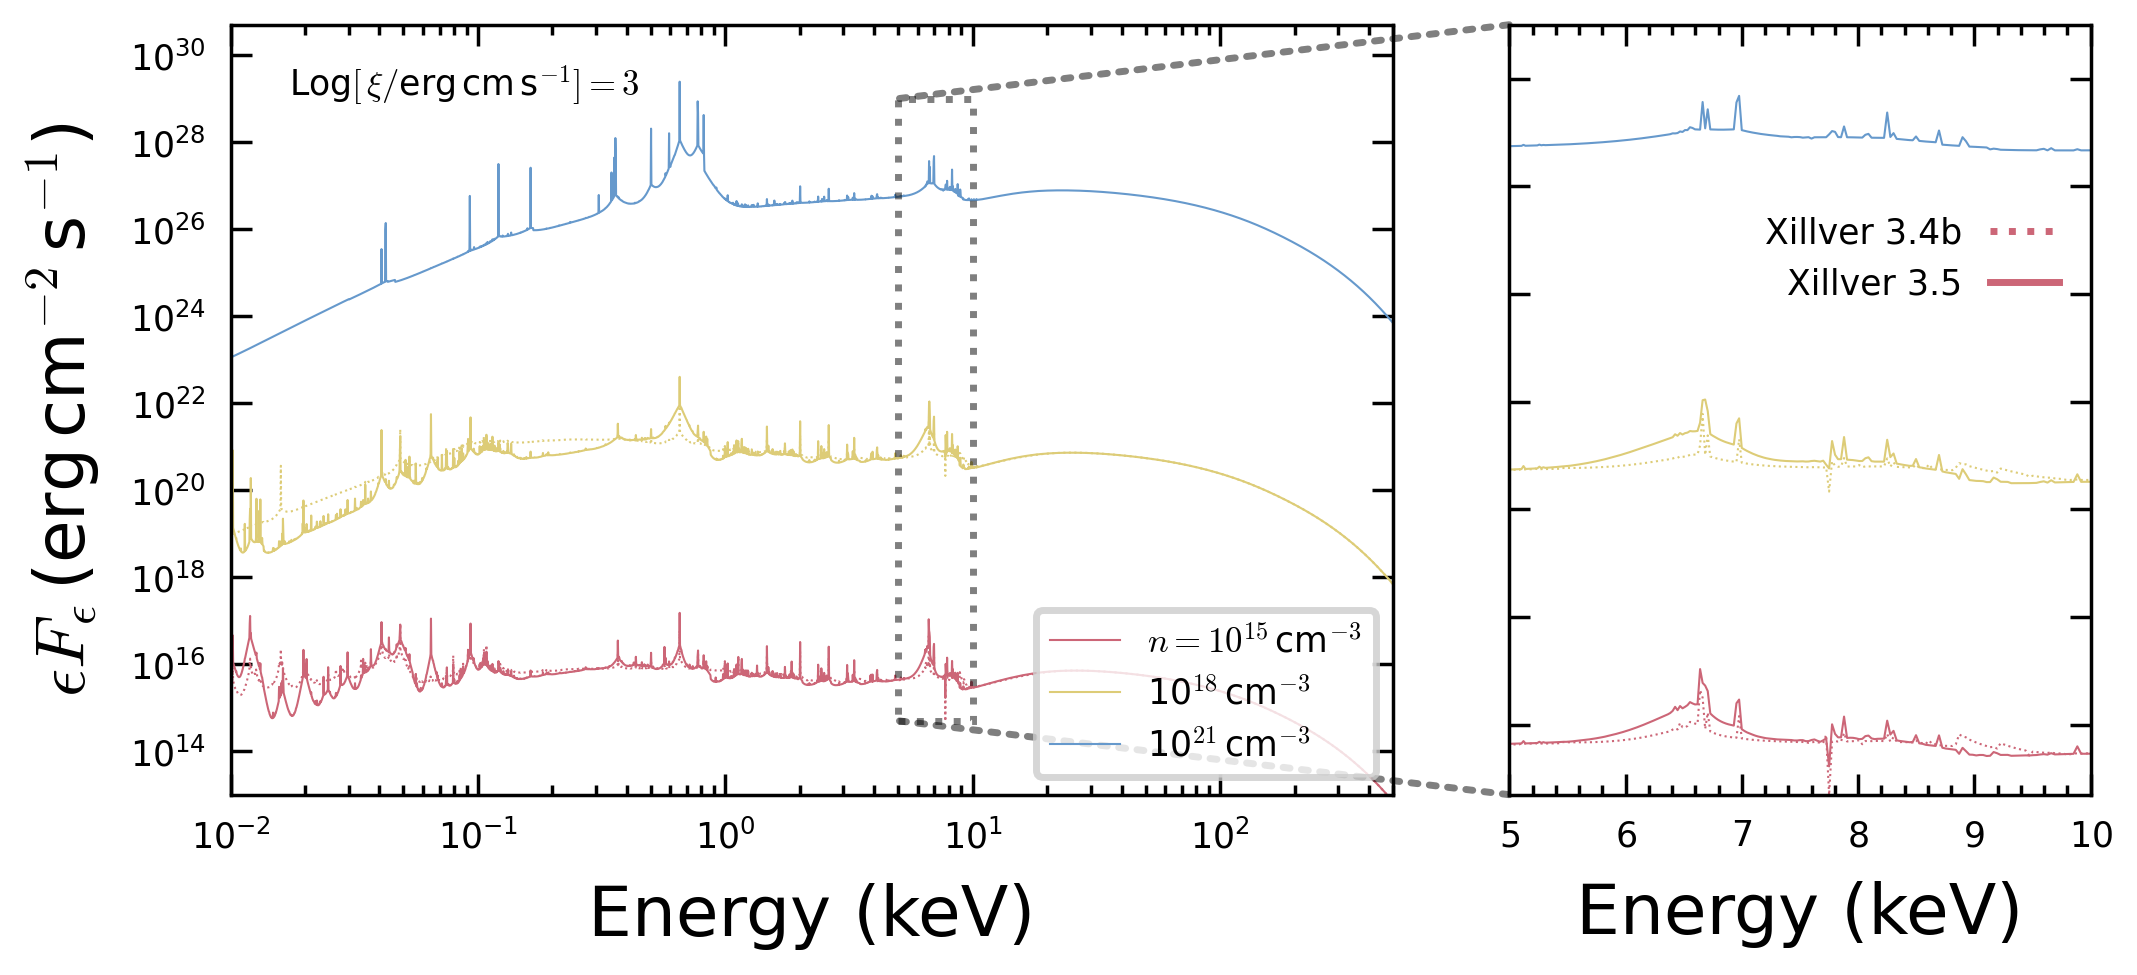

In [64]:
from astropy.io import fits
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from numpy import random
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

#specnnum="1"
bN=5000
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12

lw=0.3
numrow=1
numcol=1

fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

axins=axs.inset_axes([1.1,0.0,0.5,1])

fac=1.6e11


darray=[15,18,21]
fac=[1,1e2,1e5]
logxi=3
lines=[]
colorlst=["#CC6677","#DDCC77","#6699CC"]
for dind,density in enumerate(darray):
    

    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>13*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
    

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
    if len(specE2)>2*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)

    #Setting negative fluxes to zero
    find=foutE2<0
    foutE2[find]=0.

    #axs.plot(specE1/1e3,foutE1*eV*specE1,"c",label="Xillver_3.4b",lw=lw)
    #axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)
    if density != 21:
        axs.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ms=0.5,ls=':',color=colorlst[dind],lw=lw)
        axins.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ls=':',color=colorlst[dind],lw=lw)
    if dind==0:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],label=r"$n=10^{%d}\,$cm$^{-3}$"%density,lw=lw)
        axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
    else:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],label=r"10$^{%d}\,$cm$^{-3}$"%density,lw=lw)
        axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
    #axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
    lines.append(line)
proxy_line1 = Line2D([], [], linestyle=':', color=colorlst[0], label="Xillver 3.4b")
proxy_line2 = Line2D([], [], linestyle='-', color=colorlst[0], label="Xillver 3.5")
prolines=[]
prolines.append(proxy_line1)
prolines.append(proxy_line2)
labels=[l.get_label() for l in prolines]
#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
#axs.legend(lines,labels,loc='lower right')
axs.legend(loc='lower right',frameon=True)
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,500])
axs.set_ylim([1e13,5e30])
axs.text(0.05,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes\
         ,verticalalignment='top',horizontalalignment='left')





axins.set_xlim([5,10])
axins.set_ylim([5e14,1e29])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)
axins.legend(prolines,labels,loc='lower right',bbox_to_anchor=[1.0, 0.6],markerfirst=False)
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')
#axs.indicate_inset(5, 10, 1e14, 5e28,axins)


fig.savefig("./pub2/newcode_allspec_logxi_{}.pdf".format(logxi))

In [ ]:
from astropy.io import fits
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from numpy import random
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

#specnnum="1"
bN=5000
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12

lw=0.3
numrow=1
numcol=1

fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

axins=axs.inset_axes([1.1,0.0,0.5,1])

fac=1.6e11


darray=[15,18,21]
fac=[1,1e2,1e5]
logxi=3
lines=[]
colorlst=["#CC6677","#DDCC77","#6699CC"]
for dind,density in enumerate(darray):
    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>13*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
    

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
    if len(specE2)>2*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)

    #Setting negative fluxes to zero
    find=foutE2<0
    foutE2[find]=0.

    #axs.plot(specE1/1e3,foutE1*eV*specE1,"c",label="Xillver_3.4b",lw=lw)
    #axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)
    if density != 21:
        axs.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ms=0.5,ls=':',color=colorlst[dind],lw=lw)
        axins.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ls=':',color=colorlst[dind],lw=lw)
    if dind==0:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],label=r"$n=10^{%d}\,$cm$^{-3}$"%density,lw=lw)
        axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
    else:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],label=r"10$^{%d}\,$cm$^{-3}$"%density,lw=lw)
        axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
    #axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
    lines.append(line)
proxy_line1 = Line2D([], [], linestyle=':', color=colorlst[0], label="Xillver 3.4b")
proxy_line2 = Line2D([], [], linestyle='-', color=colorlst[0], label="Xillver 3.5")
prolines=[]
prolines.append(proxy_line1)
prolines.append(proxy_line2)
labels=[l.get_label() for l in prolines]
#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
#axs.legend(lines,labels,loc='lower right')
axs.legend(loc='lower right',frameon=True)
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,500])
axs.set_ylim([1e13,5e30])
axs.text(0.05,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes\
         ,verticalalignment='top',horizontalalignment='left')





axins.set_xlim([5,10])
axins.set_ylim([5e14,1e29])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)
axins.legend(prolines,labels,loc='lower right',bbox_to_anchor=[1.0, 0.6],markerfirst=False)
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')
#axs.indicate_inset(5, 10, 1e14, 5e28,axins)


fig.savefig("./pub2/newcode_allspec_logxi_{}.pdf".format(logxi))

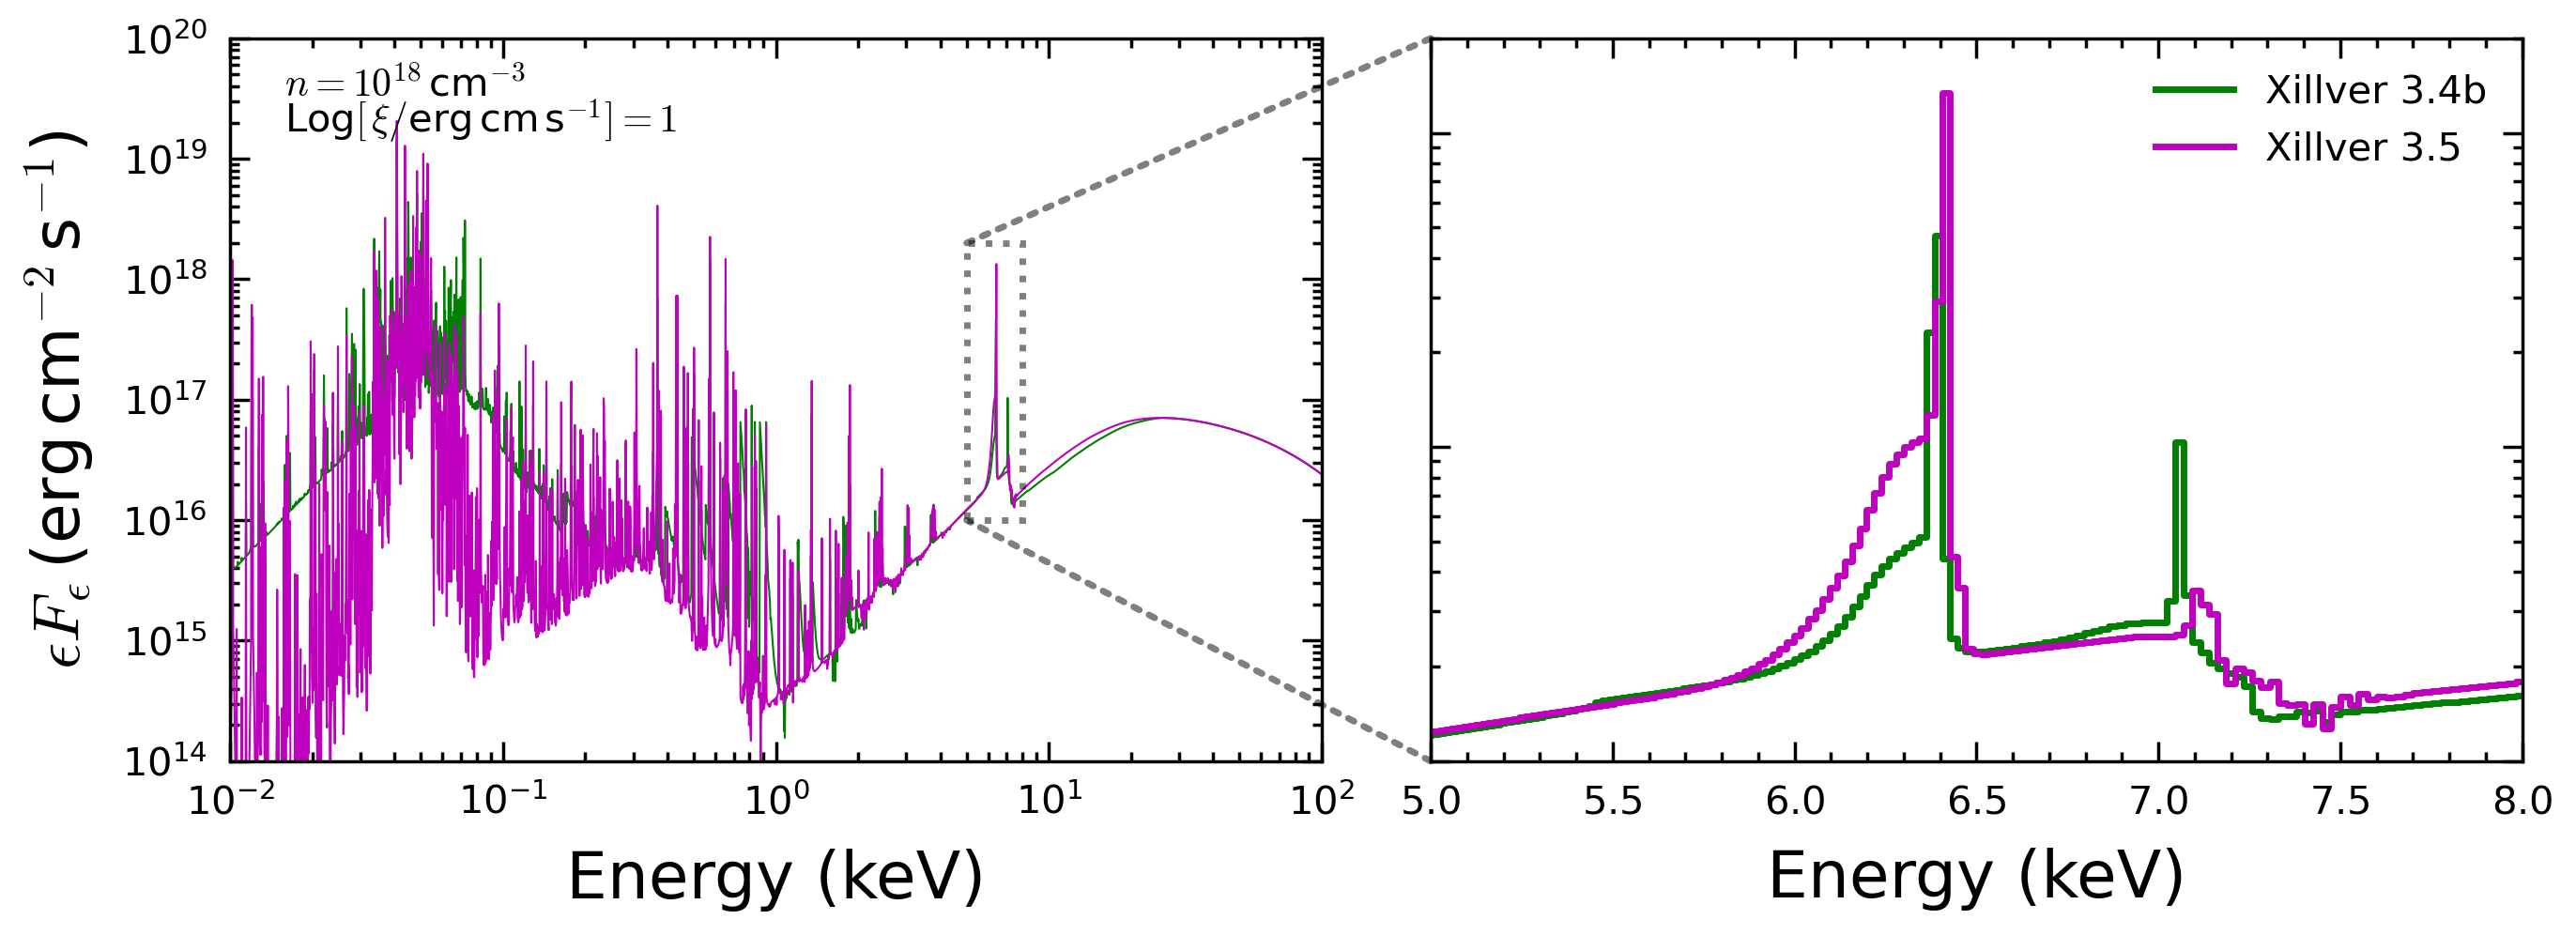

In [93]:
#Ploting spectra for publication
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":6,
"legend.fancybox":True})

lw=1
numrow=1
numcol=1
#colorlst=["#CC6677","#6699CC","#88CCEE"]
colorlst=["g","m"]
fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axins=axs.inset_axes([1.1,0.0,1.0,1])

diff1=np.abs(rx-20)
diff2=np.abs(specE2/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
fac=foutE2[ind2]*eV*specE2[ind2]/rxmo[ind1]

#Setting negative fluxes to zero
find=foutE2<0
foutE2[find]=0.


#axs.plot(rx,fac*rxmo,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(rxinput[0],fac*rxinput[2],"r-.")

axs.plot(specE1/1e3,foutE1*eV*specE1,color=colorlst[0],label="Xillver 3.4b",lw=0.3)
axins.step(specE1/1e3,foutE1*eV*specE1,color=colorlst[0],label="Xillver 3.4b",lw=lw)

#axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)

axs.plot(specE2/1e3,foutE2*eV*specE2,color=colorlst[1],ms=0.5,label="Xillver 3.5",lw=0.3)
axins.step(specE2/1e3,foutE2*eV*specE2,color=colorlst[1],ms=0.5,label="Xillver 3.5",lw=lw)

#axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
#axs.plot(specE3/1e3,foutE3*eV*specE3,"C2",ms=0.5,label="Xillver 3.5(ATDB2021)",lw=lw)

#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
#axs.legend(loc='best')
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,100])
axs.set_ylim([1e14,1e20])
#plt.axvline(x=)
#axs=plt.gca()
axs.text(0.05,0.92,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes)






axins.set_xlim([5,8])
axins.set_ylim([1e16,2e18])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)
#axins.legend(loc='upper right',bbox_to_anchor=[1.0, 0.6],markerfirst=False)
axins.legend()
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')


plt.savefig("./pub2/APRAcompRX"+datype+".pdf",dpi=300)